In [1]:
import numpy as np
import numpy.linalg as la

In [2]:
def fold_panels(P):
    m = len(P)
    Z = np.zeros((2,2,2))
    for i in range(m):
        Z[:,:,i] = np.array(P[i], dtype=np.float64)
    return Z

In [6]:
def unfold(P):
    m = P.ndim
    R = np.zeros((2, 2**(P.ndim - 1)))
    for i in range(m-1):
        R[0:2, i*2:(i+1)*2] = P[:,:,i]
    return R

In [565]:
P = fold_panels([ [[0,1],[1,0]], [[1,1],[0,0]] ])
P

array([[[0., 1.],
        [1., 1.]],

       [[1., 0.],
        [0., 0.]]])

In [554]:
R = unfold(P)
R

array([[0., 1., 1., 1.],
       [1., 0., 0., 0.]])

In [599]:
x = np.array([0.5,0.5])

In [623]:
x=np.einsum('ijk,j,k->i', P,x,x)
x

array([2.07930264e-181, 1.00000000e+000])

In [555]:
def Pi(M):
    # Steady state distribution of stochastic matrix
    x = np.random.rand(2)
    x /= la.norm(x,1)
    for i in range(100):
        x = M@x
    return x

In [557]:
print(Pi(P[:,:,0]))
print(Pi(P[:,:,1]))

[0.44577587 0.55422413]
[1. 0.]


In [558]:
def M(R, x):
    return R@np.kron(x.reshape((2,1)), np.eye(2))

In [559]:
Pi(M(R, np.array([0.25,0.75])))

array([0.8, 0.2])

In [560]:
def dxdt(R, x):
    return Pi(M(R,x)) - x

In [561]:
sp = np.linspace(0, 1, 100)
y = np.zeros(100)
for i in range(100):
    xx = sp[i]
    y[i] = la.norm(dxdt(R, np.array([xx,1-xx])))

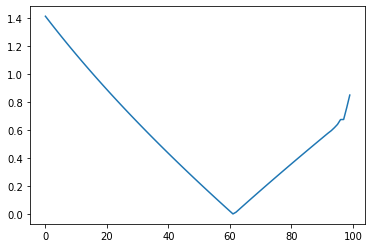

In [562]:
plt.plot(y)

In [563]:
x = np.array([0.25, 0.75])

[0.61803399 0.38196601] [ 5.66338088e-11 -5.66344749e-11]


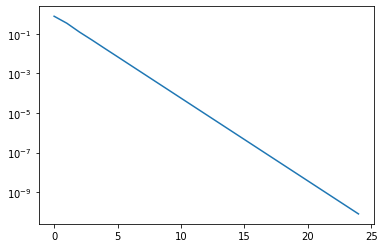

In [564]:
res = []
while True:
    dx = dxdt(R,x)
    x += dx
    x /= la.norm(x,1)
    res.append(la.norm(dx))
    if la.norm(dx) < 1e-10:
        break
print(x, dx)
plt.semilogy(res)